# Nixtla Verse for Demand Forecasting


# Table Of Contents
[Introduction](#Introduction)\
[1. StatsForecast](#1.StatsForecast)\
[2. MLForecast](#2.MLForecast)\
[3. Neural Forecast](#3.Neural_Forecast)\
[4. Hierarchical Forecast](#4.-Hierarchical_Forecast)\
[5. TS Features](#5.TS_Features)\
[Final Thought](#.Final_Thought)

# Introduction
The foundation of the Nixtla ecosystem revolves mainly around five core libraries, each focusing on distinct elements of time series forecasting.

### 1. StatsForecast: 
- Lightning-fast forecast with statistical and econometric models.
### 2. MLForecast:
- Scalable Machine Learning for time series forecasting.
### 3. Neural Forecast:
- Scalable and User-friendly neural forecasting algorithms for time series data.
### 4. Hierarchical Forecast:
Probabilistic Hierarchical Forecasting with statistical and econometric methods.
### 5. TS Features:
- Calculates various features from time series data.



### Why Nixtla?
The existing alternatives to Python for statistical models exhibit sluggishness, inaccuracy, and poor scalability. Hence, Nixtla  Verse- is an open-source library that serves as a solution for forecasting in production environments or as benchmarks. StatsForecast encompasses a comprehensive range of models that are capable of effectively accommodating millions of time series.

### Nixtla Features:
- Fastest and most accurate implementations of AutoARIMA, AutoETS, AutoCES, MSTL, and Theta in Python
- Out-of-the-box compatibility with Spark, Dask, and Ray
- Probabilistic Forecasting and Confidence Intervals
- Support for exogenous Variables and static covariates
- Anomaly Detection
- Familiar with sklearn syntax: .fit and .predict

In [2]:
import os
import pandas as pd

# This makes it so that the outputs of the predict methods have the id as a column 
# instead of as the index
os.environ['NIXTLA_ID_AS_COL'] = '1'



In [3]:
Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')
Y_df.head()


,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


### The dataset comprises:
- 414 distinct series with an average of
- 900 observations
-  To ensure reproducibility in this instance, we will specifically choose 10 unique IDs and retain data from the last week.
-  We may opt to include a greater or lesser number of series based on your processing capabilities.

In [4]:
# Select 10 ids to make the example faster
uids = Y_df['unique_id'].unique()[:10] 
Y_df = Y_df.query('unique_id in @uids')

#Select last 7 days of data to make example faster
Y_df = Y_df.groupby('unique_id').tail(7 * 24) 


The plot method from the StatsForecast class can be utilized to visualize a variety of series. This method is particularly helpful for conducting basic exploratory data analysis (EDA) as it generates 8 random series from the dataset.

### N.B.
The default engine used by the `StatsForecast.plot` method is Plotly. If we want to switch to `MatPlotLib`, we can do so by setting the engine parameter to `matplotlib`.

In [5]:
# Import of StatForest
from statsforecast import StatsForecast


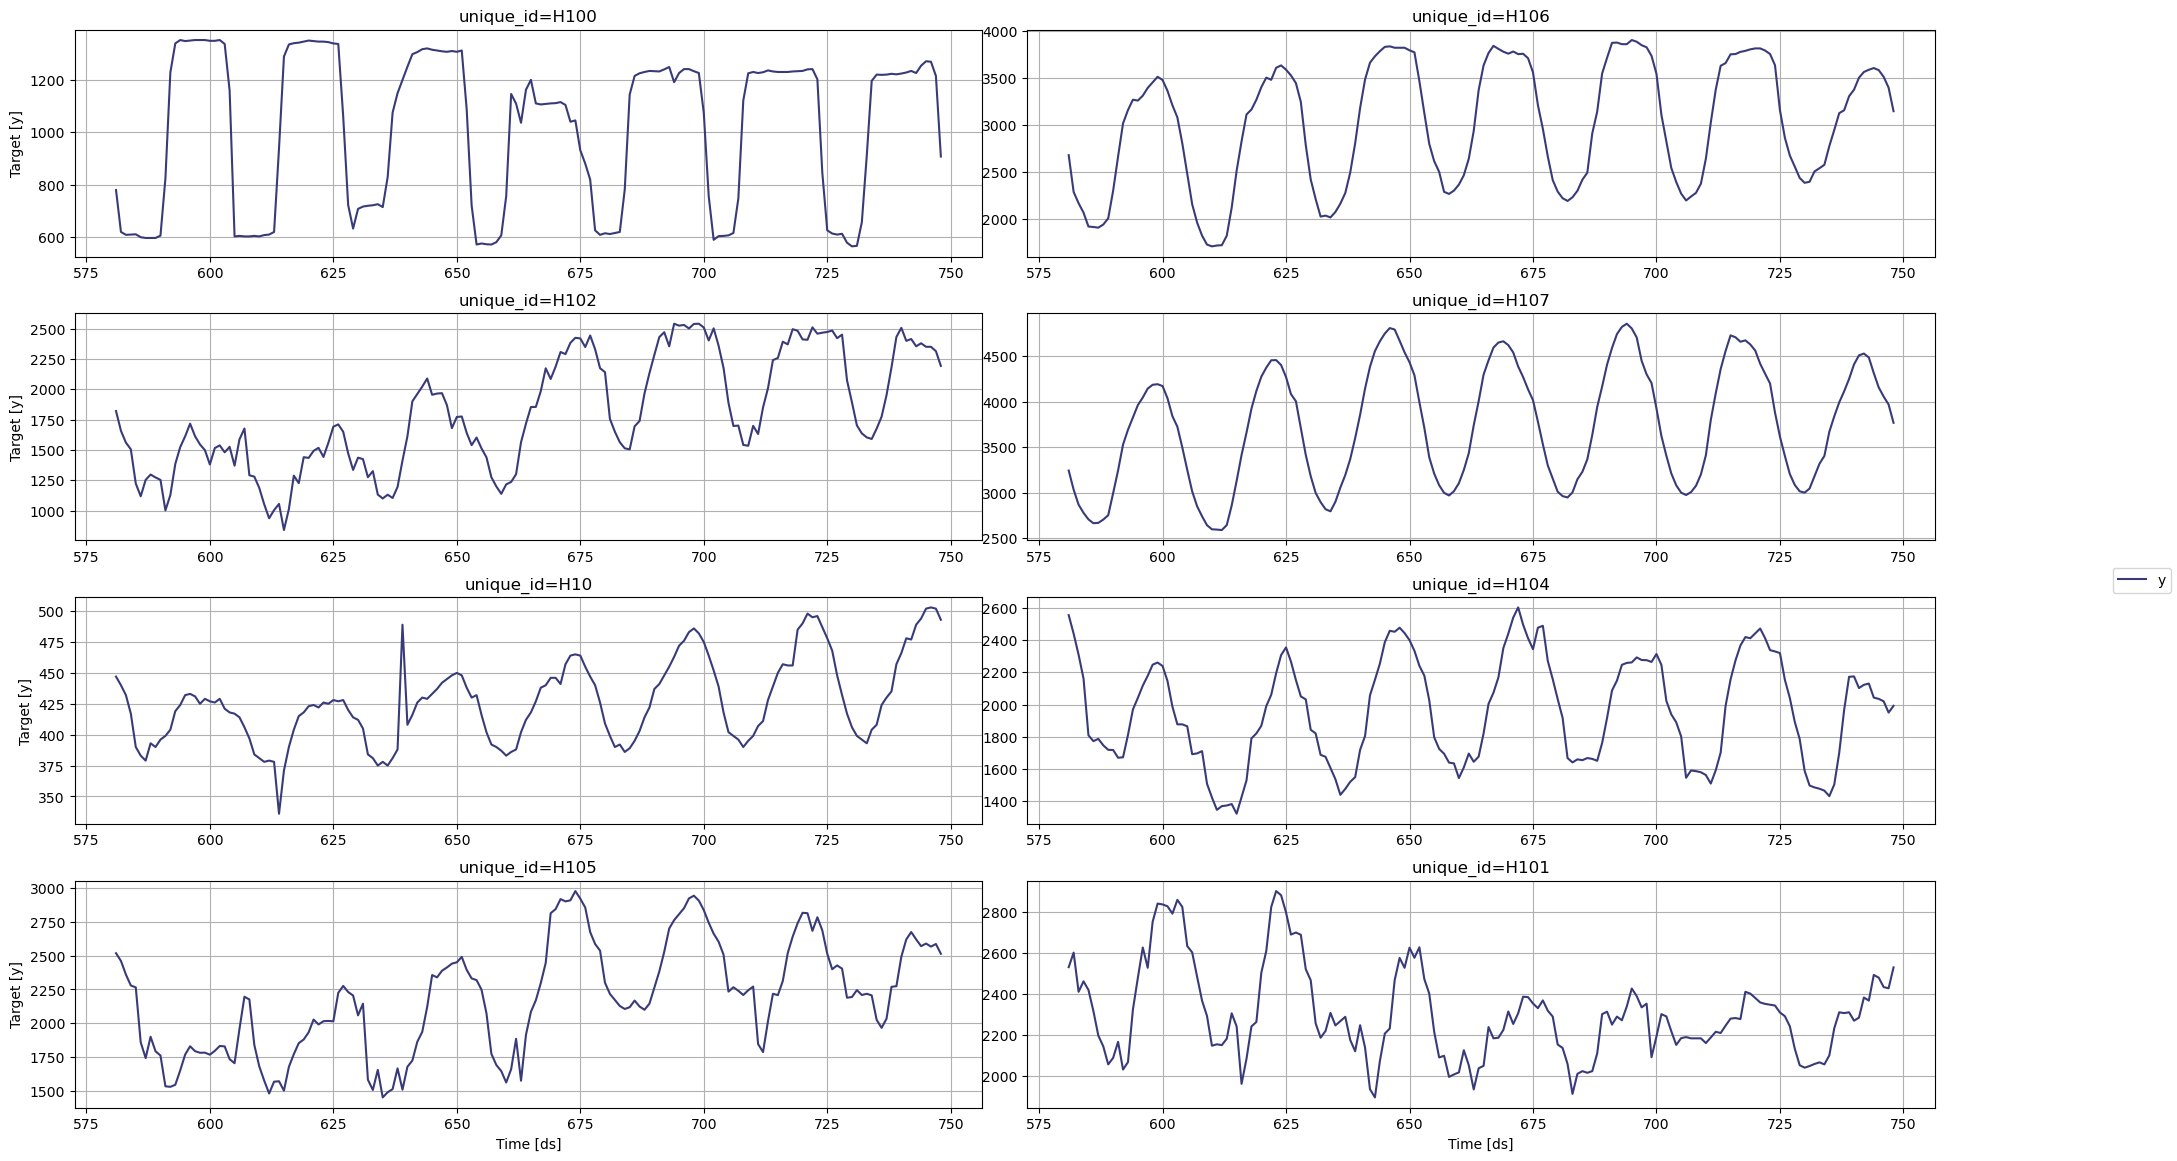

In [6]:
StatsForecast.plot(Y_df)


ict.

# 2. ML forecast
mlforecast is a platform designed for conducting time series prediction through the utilization of machine learning algorithms, offering the capability to expand to large datasets by leveraging remote clusters.


### Installation
!pip install mlforecast


### Why MLForecast?
The existing options in Python for machine learning models are sluggish, imprecise, and lack scalability. 
- Nixtla- is an open-source library
- specifically designed for forecasting in production environments.
- MLForecast incorporates effective feature engineering techniques to train any machine learning model (using fit and predict methods like sklearn) capable of
- handling millions of time series data.

### Features of MLForecast
- Swift feature engineering solutions for time series prediction in Python
- Seamless integration with pandas, polars, spark, dask, and ray
- Incorporation of Probabilistic Forecasting using Conformal Prediction
- Capability to handle exogenous variables and static covariates
- Easy-to-use sklearn syntax: .fit and .predict

In [7]:
!pip install lightgbm

In [8]:
!pip install -qqq datasetsforecast mlforecast

In [9]:
import random

import matplotlib.pyplot as plt
import pandas as pd
from datasetsforecast.m4 import M4, M4Evaluation, M4Info
from mlforecast.lgb_cv import LightGBMCV
from window_ops.expanding import expanding_mean
from window_ops.ewm import ewm_mean
from window_ops.rolling import rolling_mean, seasonal_rolling_mean

In [10]:
plt.rcParams['figure.figsize'] = 16, 6

In [11]:
await M4.async_download('data')

INFO:datasetsforecast.utils:Downloaded: submission-Naive2.zip
INFO:datasetsforecast.utils:Downloaded: Monthly-train.csv
INFO:datasetsforecast.utils:Downloaded: Daily-train.csv
INFO:datasetsforecast.utils:Decompressing zip file...
INFO:datasetsforecast.utils:Successfully decompressed data\m4\datasets\submission-Naive2.zip


In [12]:
def train_valid_split(group):
    df, *_ = M4.load(directory='data', group=group)
    df['ds'] = df['ds'].astype('int')
    horizon = M4Info[group].horizon
    valid = df.groupby('unique_id').tail(horizon)
    train = df.drop(valid.index)
    return train, valid

### Hourly validity

In [18]:
!pip install sktime

   ---------------------------------------- 0.0/23.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/23.9 MB 1.7 MB/s eta 0:00:15
   ---------------------------------------- 0.2/23.9 MB 2.2 MB/s eta 0:00:11
    --------------------------------------- 0.3/23.9 MB 2.7 MB/s eta 0:00:09
   - -------------------------------------- 0.6/23.9 MB 3.6 MB/s eta 0:00:07
   - -------------------------------------- 1.1/23.9 MB 5.0 MB/s eta 0:00:05
   -- ------------------------------------- 1.7/23.9 MB 6.4 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/23.9 MB 6.7 MB/s eta 0:00:04
   ---- ----------------------------------- 2.7/23.9 MB 7.4 MB/s eta 0:00:03
   ----- ---------------------------------- 3.1/23.9 MB 7.5 MB/s eta 0:00:03
   ------ --------------------------------- 3.6/23.9 MB 8.0 MB/s eta 0:00:03
   ------ --------------------------------- 4.0/23.9 MB 8.0 MB/s eta 0:00:03
   ------- -------------------------------- 4.6/23.9 MB 8.3 MB/s eta 0:00:03
   ---

In [19]:
hourly_train, hourly_valid = train_valid_split('Hourly')

In [28]:
import random
import tempfile
from pathlib import Path

import pandas as pd
from datasetsforecast.m4 import M4
from utilsforecast.plotting import plot_series



In [29]:
await M4.async_download('data', group='Hourly')
df, *_ = M4.load('data', 'Hourly')
uids = df['unique_id'].unique()
random.seed(0)
sample_uids = random.choices(uids, k=4)
df = df[df['unique_id'].isin(sample_uids)].reset_index(drop=True)
df['ds'] = df['ds'].astype('int64')
df


,unique_id,ds,y
0,H196,1,11.8
1,H196,2,11.4
2,H196,3,11.1
3,H196,4,10.8
4,H196,5,10.6
...,...,...,...
4027,H413,1004,99.0
4028,H413,1005,88.0
4029,H413,1006,47.0
4030,H413,1007,41.0


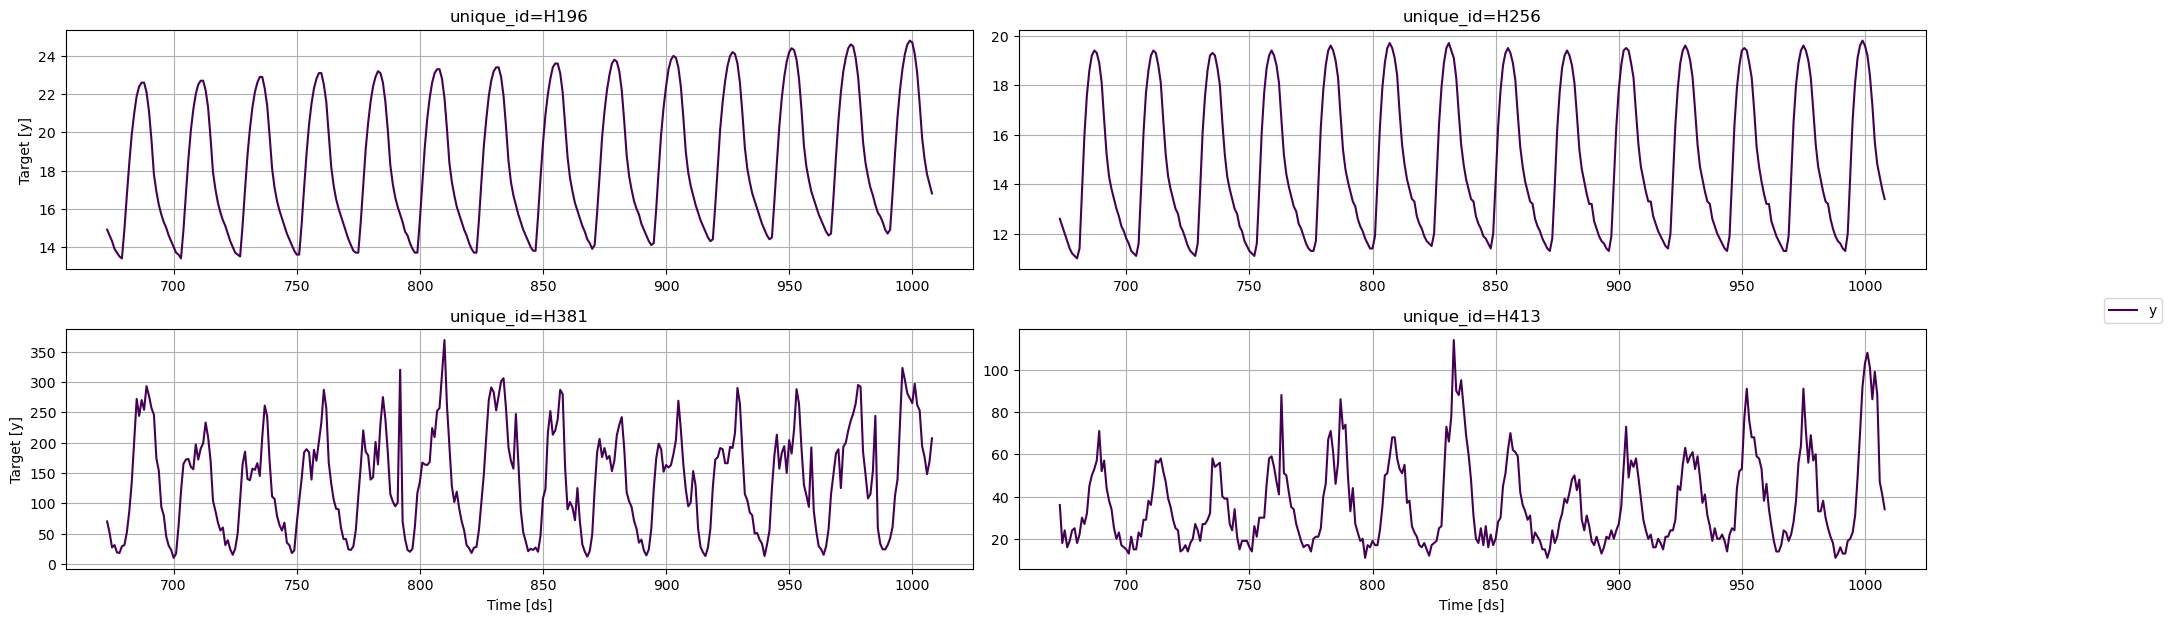

In [31]:
fig = plot_series(df, max_insample_length=24 * 14)
fig


### The MLForecast with more preprocess:
- The preprocess method allows us to examine various transformations
- These series exhibit a significant seasonal pattern based on the hour of the day
- To eliminate this pattern, we can subtract the value from the corresponding hour on the previous day
- This can be achieved by utilizing the `mlforecast.target_transforms`.
- Differences transformer, which we include in the target_transforms parameter.

In [34]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences

fcst = MLForecast(
    models=[],  # we're not interested in modeling yet
    freq=1,  # our series have integer timestamps, so we'll just add 1 in every timestep
    target_transforms=[Differences([24])],
)
prep = fcst.preprocess(df)
prep



,unique_id,ds,y
24,H196,25,0.3
25,H196,26,0.3
26,H196,27,0.1
27,H196,28,0.2
28,H196,29,0.2
...,...,...,...
4027,H413,1004,39.0
4028,H413,1005,55.0
4029,H413,1006,14.0
4030,H413,1007,3.0


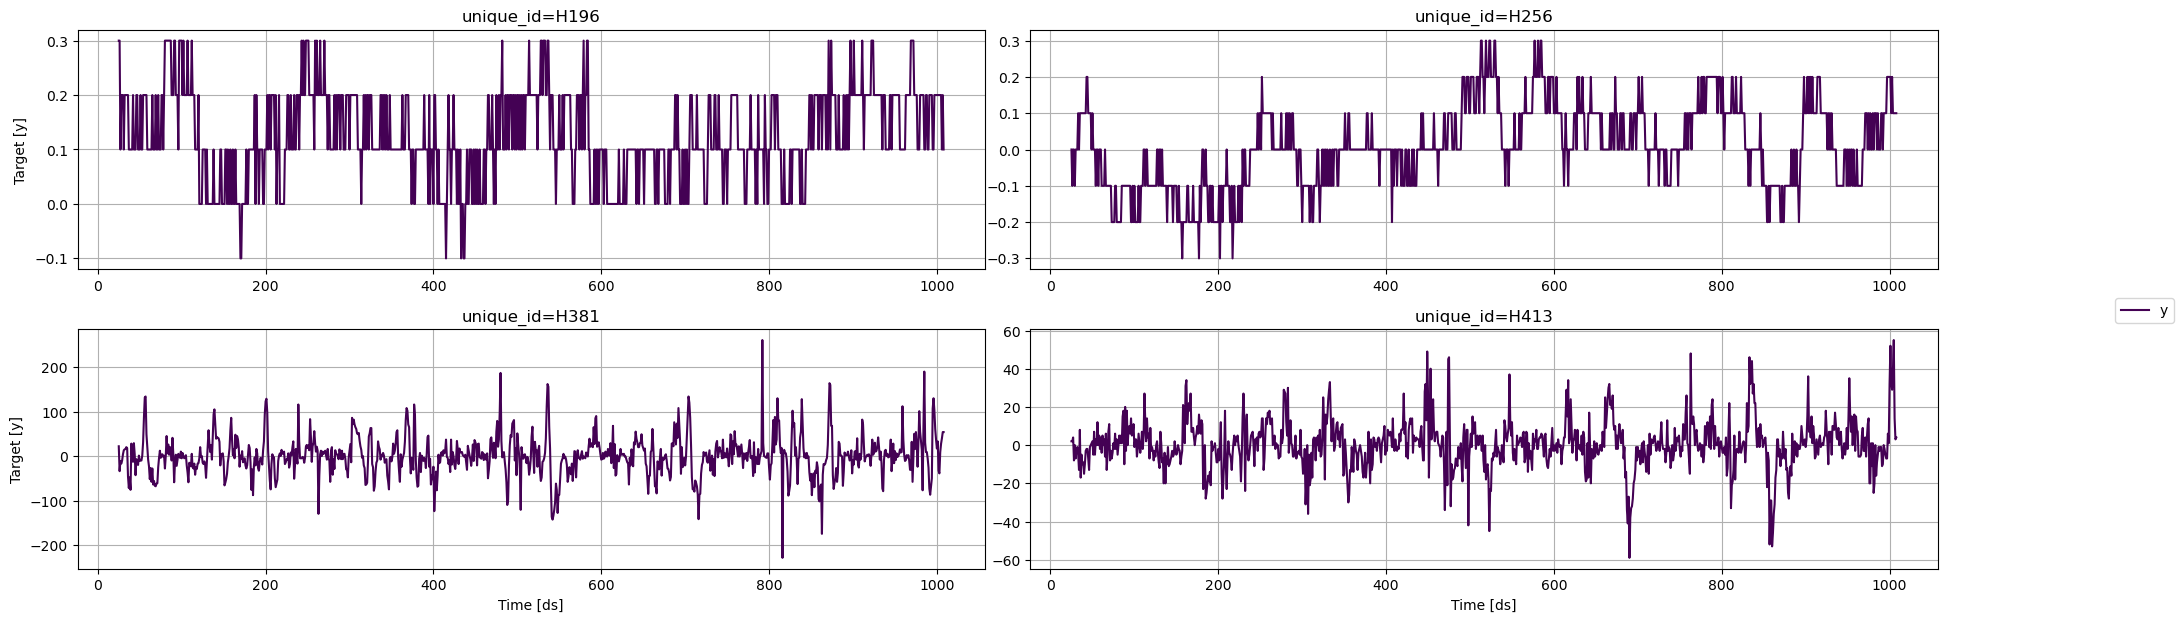

In [35]:
fig = plot_series(prep)
fig

# 3. NeuralForecast
NeuralForecast offers a large collection of neural forecasting models focused on their usability and robustness. The models range from classic networks like MLP, and RNNs to novel proven contributions like NBEATS, NHITS, TFT, and other architectures.

### Why to use NeuralForcast?
- Neural forecasting methods are widely believed to have the ability to enhance the accuracy and efficiency of our pipeline. 
- The current implementations and published research have not fully tapped into the potential of neural networks.
- These implementations are difficult to use and consistently fall short of surpassing statistical methods,
- all the while being computationally burdensome.
-
### Solution
-   To address this issue, we have developed NeuralForecast, a library that prioritizes reliable and efficient models, emphasizing their user-friendliness.

### Installation
!pip install neuralforecast


# 4. Hierarchical Forecasting 
Creating accurate forecasts for large collections of time series organized into different aggregation levels can be a challenging task. These forecasts need to adhere to the aggregation constraints of the data, which adds complexity to the process. To address this challenge, HierarchicalForecast provides a range of reconciliation methods such as BottomUp, TopDown, MiddleOut, MinTrace, and ERM. Additionally, it offers probabilistic coherent predictions like Normality, Bootstrap, and PERMBU. These methods and techniques aim to ensure that the forecasts generated are both accurate and consistent with the underlying data structure.

# Why HierarchicalForecast?
It is a comprehensive platform that combines processed datasets, evaluation metrics, and a carefully selected collection of statistical baselines. Within this library, the practical examples and references to extensive experiments demonstrate the effectiveness of these baselines and assess the accuracy of their predictions. Nixtla Verse's objective is to advance Machine Learning forecasting by :
- connecting it with statistical, and
- econometric modeling
- equipping developers with the necessary tools to create innovative hierarchical forecasting algorithms


### Installation
!pip install hierarchicalforecast



In [37]:
!pip install hierarchicalforecast


   ---------------------------------------- 0.0/45.1 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.1 kB 640.0 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/45.1 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 45.1/45.1 kB 319.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
    --------------------------------------- 0.2/14.6 MB 6.6 MB/s eta 0:00:03
   - -------------------------------------- 0.4/14.6 MB 5.5 MB/s eta 0:00:03
   - -------------------------------------- 0.7/14.6 MB 6.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/14.6 MB 5.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/14.6 MB 5.2 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.6 MB 3.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/14.6 MB 4.1 MB/s eta 0:00:04
   ------ --------------------------------- 2.2/14.6 MB 6.2 MB/s eta 0:00:03
   -

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
pygam 0.9.1 requires numpy>=1.25; python_version >= "3.9" and python_version < "3.13", but you have numpy 1.23.5 which is incompatible.


### How to Use?

In [38]:
import numpy as np
import pandas as pd

#obtain the hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

#obtain hierarchical reconciliation methods and evaluation
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.evaluation import HierarchicalEvaluation
from hierarchicalforecast.methods import BottomUp, TopDown, MiddleOut


# Load TourismSmall dataset
Y_df, S, tags = HierarchicalData.load('./data', 'TourismSmall')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

#split train/test sets
Y_test_df  = Y_df.groupby('unique_id').tail(4)
Y_train_df = Y_df.drop(Y_test_df.index)

# Compute base auto-ARIMA predictions
fcst = StatsForecast(df=Y_train_df,
                     models=[AutoARIMA(season_length=4), Naive()],
                     freq='Q', n_jobs=-1)
Y_hat_df = fcst.forecast(h=4)

# Reconcile the base predictions
reconcilers = [
    BottomUp(),
    TopDown(method='forecast_proportions'),
    MiddleOut(middle_level='Country/Purpose/State',
              top_down_method='forecast_proportions')
]
hrec = HierarchicalReconciliation(reconcilers=reconcilers)
Y_rec_df = hrec.reconcile(Y_hat_df=Y_hat_df, Y_df=Y_train_df,
                          S=S, tags=tags)


100%|█████████████████████████████████████████████████████████████████████████████| 1.30M/1.30M [00:05<00:00, 217kiB/s]
INFO:datasetsforecast.utils:Successfully downloaded datasets.zip, 1297274, bytes.
INFO:datasetsforecast.utils:Decompressing zip file...
INFO:datasetsforecast.utils:Successfully decompressed data\hierarchical\datasets.zip
C:\Users\Sarmita\anaconda3\Lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
C:\Users\Sarmita\anaconda3\Lib\site-packages\statsforecast\core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method 

AttributeError: 'NoneType' object has no attribute 'split'

# 5. TS Features
TS Features is a Python library that mirrors the functionality of the R package tsfeatures. It computes a range of features from time series data, enabling users to gain insights and extract valuable information from their datasets. Through the identification of important traits and trends, this tool facilitates enhanced and accurate forecasting.


### Installation of tsfeatures
!pip install tsfeatures


### Installation of tsfresh
!pip install tsfresh


### Why TSFeatures?
TSFeatures are essential for extracting meaningful information from time series data, making it more accessible and useful for a wide range of applications.

### tsfresh
tsfresh provides a robust and efficient solution for time series feature extraction, making it a valuable tool for various applications such as classification, regression, and anomaly detection.






In [9]:
from tsfeatures import tsfeatures

In [11]:
from tsfresh import extract_features
from tsfresh.feature_extraction import feature_calculators
import pandas as pd

def tsfeatures_r(panel, freq=7, features=["acf_features"]):
    # Assuming 'panel' is a DataFrame with time series data
    # Make sure 'panel' contains columns 'id' for time series ID and 'time' for timestamps
    # and other columns for time series data

    # Extract features using tsfresh
    extracted_features = extract_features(panel, column_id='id', column_sort='time')

    # Dictionary to store the features
    result = {}

    # Loop through requested features
    for feature in features:
        # Check if feature is available in extracted_features DataFrame
        if feature in extracted_features.columns:
            # Store the feature in the result dictionary
            result[feature] = extracted_features[feature]
        else:
            # If feature not found, calculate it manually using tsfresh's feature calculators
            if feature == "acf_features":
                # Calculate autocorrelation features
                result[feature] = extracted_features.apply(lambda x: feature_calculators.autocorrelation(x, lag=1))

    return result

# Example usage:
# Assuming 'panel' is a DataFrame with time series data
panel = pd.DataFrame({
    'id': [1, 1, 1, 2, 2, 2],  # Time series ID
    'time': [1, 2, 3, 1, 2, 3],  # Timestamps
    'value': [10, 20, 30, 15, 25, 35]  # Time series values
})

# Extract autocorrelation features using tsfeatures_r function
autocorrelation_features = tsfeatures_r(panel, freq=7, features=["acf_features"])
print(autocorrelation_features)


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.58s/it]

{'acf_features': value__variance_larger_than_standard_deviation              NaN
value__has_duplicate_max                                    NaN
value__has_duplicate_min                                    NaN
value__has_duplicate                                        NaN
value__sum_values                                          -1.0
                                                           ... 
value__permutation_entropy__dimension_5__tau_1              NaN
value__permutation_entropy__dimension_6__tau_1              NaN
value__permutation_entropy__dimension_7__tau_1              NaN
value__query_similarity_count__query_None__threshold_0.0    NaN
value__mean_n_absolute_max__number_of_maxima_7              NaN
Length: 783, dtype: float64}


# Final Thought
Nixtla is constructing time series forecasting technology in a meticulous manner by prioritizing evaluation and reproducibility. Additionally, they ensure seamless integration with engineering systems and offer a diverse range of options, enabling users to select the most suitable tool for their specific requirements.